In [2]:
"""
FROM EDA
1. Packages
All the packages we'll need for the various algorithms we can use
"""

# Global imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn import preprocessing

np.random.seed(0)
pd.__version__

'0.22.0'

In [3]:
# FROM EDA 2.4 Load ALL data
train_all = pd.read_csv('../Data/subsetted/train_all.csv', sep=',', engine='python')

# Load all training data
train_data_all = pd.read_csv('../Data/subsetted/subsetted_training_data_all.csv', sep=',', engine='python')
print('Subsetted data done')

Subsetted data done


In [4]:
train_data_all['labels'] = train_all['logerror']

In [5]:
# FROM EDA 3. Check the data

# 3.1 Data shape
# Check the shape of the train data
print("Train data shape:", train_all.shape, "Subsetted train data shape:", train_data_all.shape)

# 3.2 Descriptive stats of train data
# Descriptive statistics of train data
train_data_all.describe()

Train data shape: (167888, 3) Subsetted train data shape: (167888, 59)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,labels
count,1.678880e+05,53788.000000,468.000000,93.000000,167854.000000,167854.000000,31.000000,107173.000000,166056.000000,1272.0,...,166828.000000,38169.000000,1.673590e+05,1.678520e+05,167854.000000,1.678510e+05,167843.000000,4683.000000,1.670020e+05,167888.000000
mean,1.299536e+07,1.814345,7.299145,695.376344,2.288265,3.041739,3.967742,6.015461,2.312542,66.0,...,1968.569311,1.437764,1.843460e+05,4.726833e+05,2015.462181,2.888805e+05,5989.515575,13.827247,6.049390e+13,0.013906
std,3.016071e+06,2.970239,2.719633,583.952144,1.000835,1.149134,0.179605,1.882799,0.977808,0.0,...,23.777202,0.544508,2.192841e+05,6.028372e+05,0.498569,4.456451e+05,7214.731946,2.421658,1.054137e+12,0.165706
min,1.071174e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,...,1824.000000,1.000000,4.400000e+01,2.200000e+01,2015.000000,2.200000e+01,19.920000,3.000000,6.037101e+13,-4.655420
25%,1.154899e+07,1.000000,7.000000,280.000000,2.000000,2.000000,4.000000,4.000000,2.000000,66.0,...,1953.000000,1.000000,8.256800e+04,2.026522e+05,2015.000000,8.373000e+04,2798.070000,13.000000,6.037312e+13,-0.025300
50%,1.254060e+07,1.000000,7.000000,588.000000,2.000000,3.000000,4.000000,7.000000,2.000000,66.0,...,1970.000000,1.000000,1.340510e+05,3.500000e+05,2015.000000,1.977760e+05,4501.040000,14.000000,6.037604e+13,0.006000
75%,1.421930e+07,1.000000,7.000000,819.000000,3.000000,4.000000,4.000000,7.000000,3.000000,66.0,...,1987.000000,2.000000,2.142570e+05,5.540020e+05,2016.000000,3.553340e+05,6914.165000,15.000000,6.059042e+13,0.039200
max,1.676893e+08,13.000000,21.000000,3560.000000,20.000000,16.000000,4.000000,12.000000,20.000000,66.0,...,2016.000000,6.000000,1.142179e+07,4.906124e+07,2016.000000,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


In [6]:
# Variables types
# Print the type of each variable
print("ALL DATA TYPES")
print(train_data_all.dtypes)

ALL DATA TYPES
parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                 

In [7]:
# Remove the 34 NaN's 

# Columns to remove NaN from
rmv = [
    'longitude',
    'latitude',
    'propertylandusetypeid',
    'regionidcounty'
]

# Remove the NaNs
train_data = train_data_all.dropna(subset=rmv)

# Check the data
print('train_data shape:', train_data.shape)
print('Number of values removed:', train_data_all.shape[0] - train_data.shape[0])
nan_counts = train_data.isnull().sum()
print(nan_counts)

train_data shape: (167854, 59)
Number of values removed: 34
parcelid                             0
airconditioningtypeid           114066
architecturalstyletypeid        167386
basementsqft                    167761
bathroomcnt                          0
bedroomcnt                           0
buildingclasstypeid             167823
buildingqualitytypeid            60681
calculatedbathnbr                 1798
decktypeid                      166582
finishedfloor1squarefeet        154961
calculatedfinishedsquarefeet       862
finishedsquarefeet12              8335
finishedsquarefeet13            167779
finishedsquarefeet15            161263
finishedsquarefeet50            154961
finishedsquarefeet6             167047
fips                                 0
fireplacecnt                    149958
fullbathcnt                       1798
garagecarcnt                    112397
garagetotalsqft                 112397
hashottuborspa                  163950
heatingorsystemtypeid            62203
lati

In [8]:
# Remove Features

# Remove features with few data points, redudant features, unrelated features
rmv = [
    'parcelid',
    'regionidneighborhood',
    'basementsqft',
    'finishedfloor1squarefeet',
    'finishedsquarefeet6',
    'finishedsquarefeet13',
    'finishedsquarefeet15',
    'finishedsquarefeet50',
    'storytypeid',
    'fireplaceflag',
    'yardbuildingsqft26',
    'decktypeid',
    'architecturalstyletypeid',
    'buildingclasstypeid',
    'typeconstructiontypeid',
    'propertyzoningdesc',
    'rawcensustractandblock',
    'censustractandblock',
    'taxdelinquencyyear',
    'hashottuborspa',
    'pooltypeid7' # pool without hot tub - 81% NaN if 1 means there's a pool, no hot tub
]

train_data = train_data.drop(rmv, axis=1) # axis=1 to remove columns

# Check the data
print('train_data shape:', train_data.shape)
print('Number of cols removed:', train_data_all.shape[1] - train_data.shape[1])
print(list(train_data))

train_data shape: (167854, 38)
Number of cols removed: 21
['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'propertycountylandusecode', 'propertylandusetypeid', 'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag', 'labels']


In [9]:
# Recode NaNs to specific values

# Create a function for reused code
def recode_cols(cols, val):
    # For each col in the list, replace NaN with val
    for c in cols:
        train_data[c].fillna(val, inplace=True)
        # Check as we go
        print(c, train_data[c].isnull().sum())
        
# Recode features

# Code NaN as 0
rcd = [
    'calculatedfinishedsquarefeet',
    'finishedsquarefeet12',
    'threequarterbathnbr',
    'fullbathcnt',
    'fireplacecnt',
    'poolcnt'
]

print('Recoding to 0: \n%s' %rcd)
recode_cols(rcd, 0)

# Code NaN as 1
rcd =[
    'numberofstories',
    'unitcnt'
]

print('\nRecoding to 1: \n%s' %rcd)
recode_cols(rcd, 1)

# Code NaN as -1
rcd = ['fips']

print('\nRecoding to -1: \n%s' %rcd)
recode_cols(rcd, -1)

# Code NaN as -9
rcd = [
    'latitude',
    'longitude',
    'regionidcounty',
    'regionidcity',
    'regionidzip',
    'lotsizesquarefeet',
    'roomcnt',
    'bedroomcnt',
    'airconditioningtypeid',
    'heatingorsystemtypeid',
    'buildingqualitytypeid',
    'propertycountylandusecode',
    'propertylandusetypeid'
]

print('\nRecoding to -9: \n%s' %rcd)
recode_cols(rcd, -9)

# Recode Y as 1, NaNs as 0
rcd = ['taxdelinquencyflag']

print('\nRecoding "Y" to 1, NaN to 0')

# The replacing of Y and NaN
train_data[rcd[0]].replace(to_replace='Y', value=1, inplace=True)
train_data[rcd[0]].fillna(0, inplace=True)

# Check
print(rcd[0], train_data[rcd[0]].isnull().sum())

Recoding to 0: 
['calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'threequarterbathnbr', 'fullbathcnt', 'fireplacecnt', 'poolcnt']
calculatedfinishedsquarefeet 0
finishedsquarefeet12 0
threequarterbathnbr 0
fullbathcnt 0
fireplacecnt 0
poolcnt 0

Recoding to 1: 
['numberofstories', 'unitcnt']
numberofstories 0
unitcnt 0

Recoding to -1: 
['fips']
fips 0

Recoding to -9: 
['latitude', 'longitude', 'regionidcounty', 'regionidcity', 'regionidzip', 'lotsizesquarefeet', 'roomcnt', 'bedroomcnt', 'airconditioningtypeid', 'heatingorsystemtypeid', 'buildingqualitytypeid', 'propertycountylandusecode', 'propertylandusetypeid']
latitude 0
longitude 0
regionidcounty 0
regionidcity 0
regionidzip 0
lotsizesquarefeet 0
roomcnt 0
bedroomcnt 0
airconditioningtypeid 0
heatingorsystemtypeid 0
buildingqualitytypeid 0
propertycountylandusecode 0
propertylandusetypeid 0

Recoding "Y" to 1, NaN to 0
taxdelinquencyflag 0


In [10]:
# Pool Variable Editing
# No pool/pool 0/1
# Hashottuborspa moved to delete section, less than 400 valid entries
# Poolsizesum removed, % NaN doesn't align with number of Poolcnt NaNs
# Poolcnt moved to "Convert to 0 section"

rcd = [
    'pooltypeid10', # spa or hottub - 99% NaN if 1 means there's a hottub
    'pooltypeid2', # pool w/ spa/hot tub - 98.5% NaN if 1 means there's a hottub
]

train_data['hashottub'] = np.where((train_data['pooltypeid10'] == 1)|(train_data['pooltypeid2'] == 1), 1, 0)

train_data = train_data.drop(['pooltypeid10', 'pooltypeid2'], axis=1)

# Check the data
print('train_data shape:', train_data.shape)
print(list(train_data))

train_data shape: (167854, 37)
['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'propertycountylandusecode', 'propertylandusetypeid', 'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag', 'labels', 'hashottub']


In [11]:
# Now create the new labels data set after we've removed, inputed, converted the training features
train_labels = train_data['labels']

# We also want a set of labels that are binarized to see if that improves classifier performance
# Define a function that applies a threshold to turn positive log error to 1 and negative error to 0
train_labels_bin = train_data['labels'].copy()
train_labels_bin[train_labels_bin > 0] = 1
train_labels_bin[train_labels_bin <= 0] = 0

check_labels = pd.concat([train_labels.rename('raw'), train_labels_bin.rename('bin')], axis=1)

In [12]:
# Rename to train data processed
train_data = train_data.drop('labels', axis=1)

# Remove non int or float objs (important for imputing later)
train_data = train_data.select_dtypes(['float64','int64'])
train_data.shape

(167854, 34)

In [13]:
print(check_labels['raw'].shape)
print(check_labels['bin'].shape)
print(train_data.shape)

# Record final column names
col_names = list(train_data)

(167854,)
(167854,)
(167854, 34)


In [14]:
# Check the data
print('train_data shape:', train_data.shape)
nan_counts = train_data.isnull().sum()
print(nan_counts)

train_data shape: (167854, 34)
airconditioningtypeid                0
bathroomcnt                          0
bedroomcnt                           0
buildingqualitytypeid                0
calculatedbathnbr                 1798
calculatedfinishedsquarefeet         0
finishedsquarefeet12                 0
fips                                 0
fireplacecnt                         0
fullbathcnt                          0
garagecarcnt                    112397
garagetotalsqft                 112397
heatingorsystemtypeid                0
latitude                             0
longitude                            0
lotsizesquarefeet                    0
poolcnt                              0
poolsizesum                     166016
propertylandusetypeid                0
regionidcity                         0
regionidcounty                       0
regionidzip                          0
roomcnt                              0
threequarterbathnbr                  0
unitcnt                          

In [15]:
# Shuffle and split the data into test and train

print('data shape: ', train_data.shape)
print('labels shape: ', train_labels.shape)
print('binary labels shape:', train_labels_bin.shape)

# 4.3 Set the X, Y, and Y(binarized labels) variables
X, Y, Yb = np.asarray(train_data), np.asarray(train_labels), np.asarray(train_labels_bin)

print('\ndata shape: ', X.shape)
print('labels shape: ', Y.shape)
print('binary labels shape: ', Yb.shape)

# 4.4 Shuffle the variables
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y, Yb = X[shuffle], Y[shuffle], Yb[shuffle]

print('\ndata shape: ', X.shape)
print('target shape: ', Y.shape)
print('target (binarized) shape: ', Yb.shape)

# # 4.5 Create different arrays for training and testing data.
train_data, train_labels, train_labels_bin = X[:130000], Y[:130000], Yb[:130000]
test_data, test_labels, test_labels_bin = X[130000:], Y[130000:], Yb[130000:]

data shape:  (167854, 34)
labels shape:  (167854,)
binary labels shape: (167854,)

data shape:  (167854, 34)
labels shape:  (167854,)
binary labels shape:  (167854,)

data shape:  (167854, 34)
target shape:  (167854,)
target (binarized) shape:  (167854,)


In [16]:
# Back to pandas data frames
train_data = pd.DataFrame(train_data, columns=col_names)
test_data = pd.DataFrame(test_data, columns=col_names)

train_labels = pd.DataFrame(train_labels, columns=['raw'])
test_labels = pd.DataFrame(test_labels, columns=['raw'])

train_labels_bin = pd.DataFrame(train_labels_bin, columns=['bin'])
test_labels_bin = pd.DataFrame(test_labels_bin, columns=['bin'])

check = [train_data, test_data, train_labels, test_labels, train_labels_bin, test_labels_bin]
for c in check:
    print(c.shape, '\n', type(c), '\n', list(c), '\n')

(130000, 34) 
 <class 'pandas.core.frame.DataFrame'> 
 ['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'propertylandusetypeid', 'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag'] 

(37854, 34) 
 <class 'pandas.core.frame.DataFrame'> 
 ['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'la

In [17]:
# Impute Data

imp = [
    'yearbuilt',
    'calculatedbathnbr',
    'bathroomcnt',
    'garagecarcnt',
    'garagetotalsqft',
    'taxvaluedollarcnt',
    'structuretaxvaluedollarcnt',
    'landtaxvaluedollarcnt',
    'taxamount',
    'assessmentyear',
    'yardbuildingsqft17'
]

# Replace all NaN objects with 'NaN' as per sklearn documentation says
train_data = train_data.replace(np.nan, 'NaN')
test_data = test_data.replace(np.nan, 'NaN')

# Create and fit the imputer, transform the data
imputer = preprocessing.Imputer()
train_imputed = imputer.fit_transform(train_data)
test_imputed = imputer.transform(test_data)

# Reassign dfs
train_data = pd.DataFrame(train_imputed, columns=col_names)
test_data = pd.DataFrame(test_imputed, columns=col_names)

# Check shape
print(train_data.shape)
print(test_data.shape)

# Check data
for i in imp:
    print(i, train_data[i].isnull().sum())
    print(i, test_data[i].isnull().sum())

(130000, 34)
(37854, 34)
yearbuilt 0
yearbuilt 0
calculatedbathnbr 0
calculatedbathnbr 0
bathroomcnt 0
bathroomcnt 0
garagecarcnt 0
garagecarcnt 0
garagetotalsqft 0
garagetotalsqft 0
taxvaluedollarcnt 0
taxvaluedollarcnt 0
structuretaxvaluedollarcnt 0
structuretaxvaluedollarcnt 0
landtaxvaluedollarcnt 0
landtaxvaluedollarcnt 0
taxamount 0
taxamount 0
assessmentyear 0
assessmentyear 0
yardbuildingsqft17 0
yardbuildingsqft17 0


In [18]:
# Normalize the data
scaler = preprocessing.StandardScaler()
scaler.fit(train_data)

print(scaler.mean_)
print(scaler.var_)

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

# Reassign dfs
train_data = pd.DataFrame(train_scaled, columns=col_names)
test_data = pd.DataFrame(test_scaled, columns=col_names)

[-5.55053846e+00  2.28633846e+00  3.04112308e+00  5.85907692e-01
  2.31078874e+00  1.76851911e+03  1.66388543e+03  6.04885149e+03
  1.27638462e-01  2.21946923e+00  1.81449059e+00  3.47633451e+02
 -8.64923077e-01  3.40062359e+07 -1.18201105e+08  2.63014161e+04
  2.02115385e-01  5.21753996e+02  2.61822623e+02  3.31617414e+04
  2.52938696e+03  9.65299135e+04  1.47864615e+00  1.32761538e-01
  1.07215385e+00  3.08690501e+02  1.96852461e+03  1.09966923e+00
  1.84018239e+05  4.72382283e+05  2.01546297e+03  2.88916910e+05
  5.98294168e+03  2.77692308e-02]
[2.82470305e+01 9.96106439e-01 1.32220120e+00 5.42977429e+01
 9.39989321e-01 8.96035169e+05 9.48520204e+05 4.28825361e+02
 1.61808423e-01 9.68440949e-01 1.20445085e-01 2.33133337e+04
 4.72997696e+01 7.00257538e+10 1.29437470e+11 1.35558236e+10
 1.61264756e-01 2.75143407e+02 2.72367759e+01 2.20860813e+09
 6.46107399e+05 1.79841484e+07 7.96680555e+00 1.17905143e-01
 7.46793822e-01 1.57778648e+03 5.63199498e+02 1.01073737e-01
 4.74979201e+10 3.6

In [19]:
# Check the data
print('train_data shape:', train_data.shape)
nan_counts = train_data.isnull().sum()
print(nan_counts)

# Check the data
print('\ntest_data shape:', test_data.shape)
nan_counts = test_data.isnull().sum()
print(nan_counts)

train_data shape: (130000, 34)
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
poolsizesum                     0
propertylandusetypeid           0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
threequarterbathnbr             0
unitcnt                         0
yardbuildingsqft17              0
yearbuilt                       0
numberofstories                 0
structuretaxvalue

In [20]:
# Save files
file_names = [
    'train_data_processed', 'test_data_processed', 
    'train_labels_processed', 'test_labels_processed', 
    'train_labels_bin_processed', 'test_labels_bin_processed'
]

write = [
    train_data, test_data,
    train_labels, test_labels,
    train_labels_bin, test_labels_bin
]

for i in range(6):
    f = '../Data/final/' + file_names[i] + '.csv'
    write[i].to_csv(f, index=False)

In [25]:
print(list(train_data))

['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'propertylandusetypeid', 'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag']


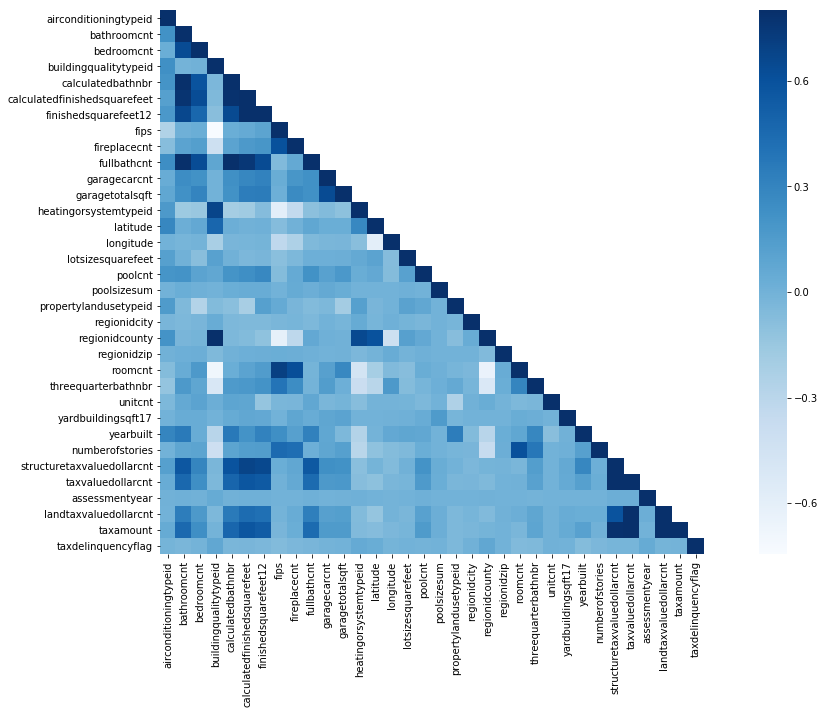

In [27]:
import seaborn as sn
features = ['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'propertylandusetypeid', 'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag']

corrMatt = train_data[features].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)

sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True, cmap="Blues")